<a href="https://colab.research.google.com/github/ak-boateng/air-quality-index/blob/main/Air_Quality_Index_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Global Air Quality Index (AQI)

## 1. Objective:
Analyze PM2.5 (fine particulate matter) levels across different cities and countries to identify trends, hotspots, and potential environmental or policy influences.

All other information can be found in the documentation in the PDF attached to this repo.

## 2. Data Cleaning & Preprocessing
Here the data set will be imported and cleaned to be ready for the analysis.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


#library to check missingness in the data
import missingno as msno

In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/data/openaq.csv", sep=';')

## Detecting missing data visually using Missingno library
Here I check for the missing values, reason for the missingness, and how to deal with them. To graphically analyse the missingness of the data, I used a library called Missingno It is a package for graphical analysis of missing values. To use this library, I imported it as follows: import missingno as msno

<Axes: >

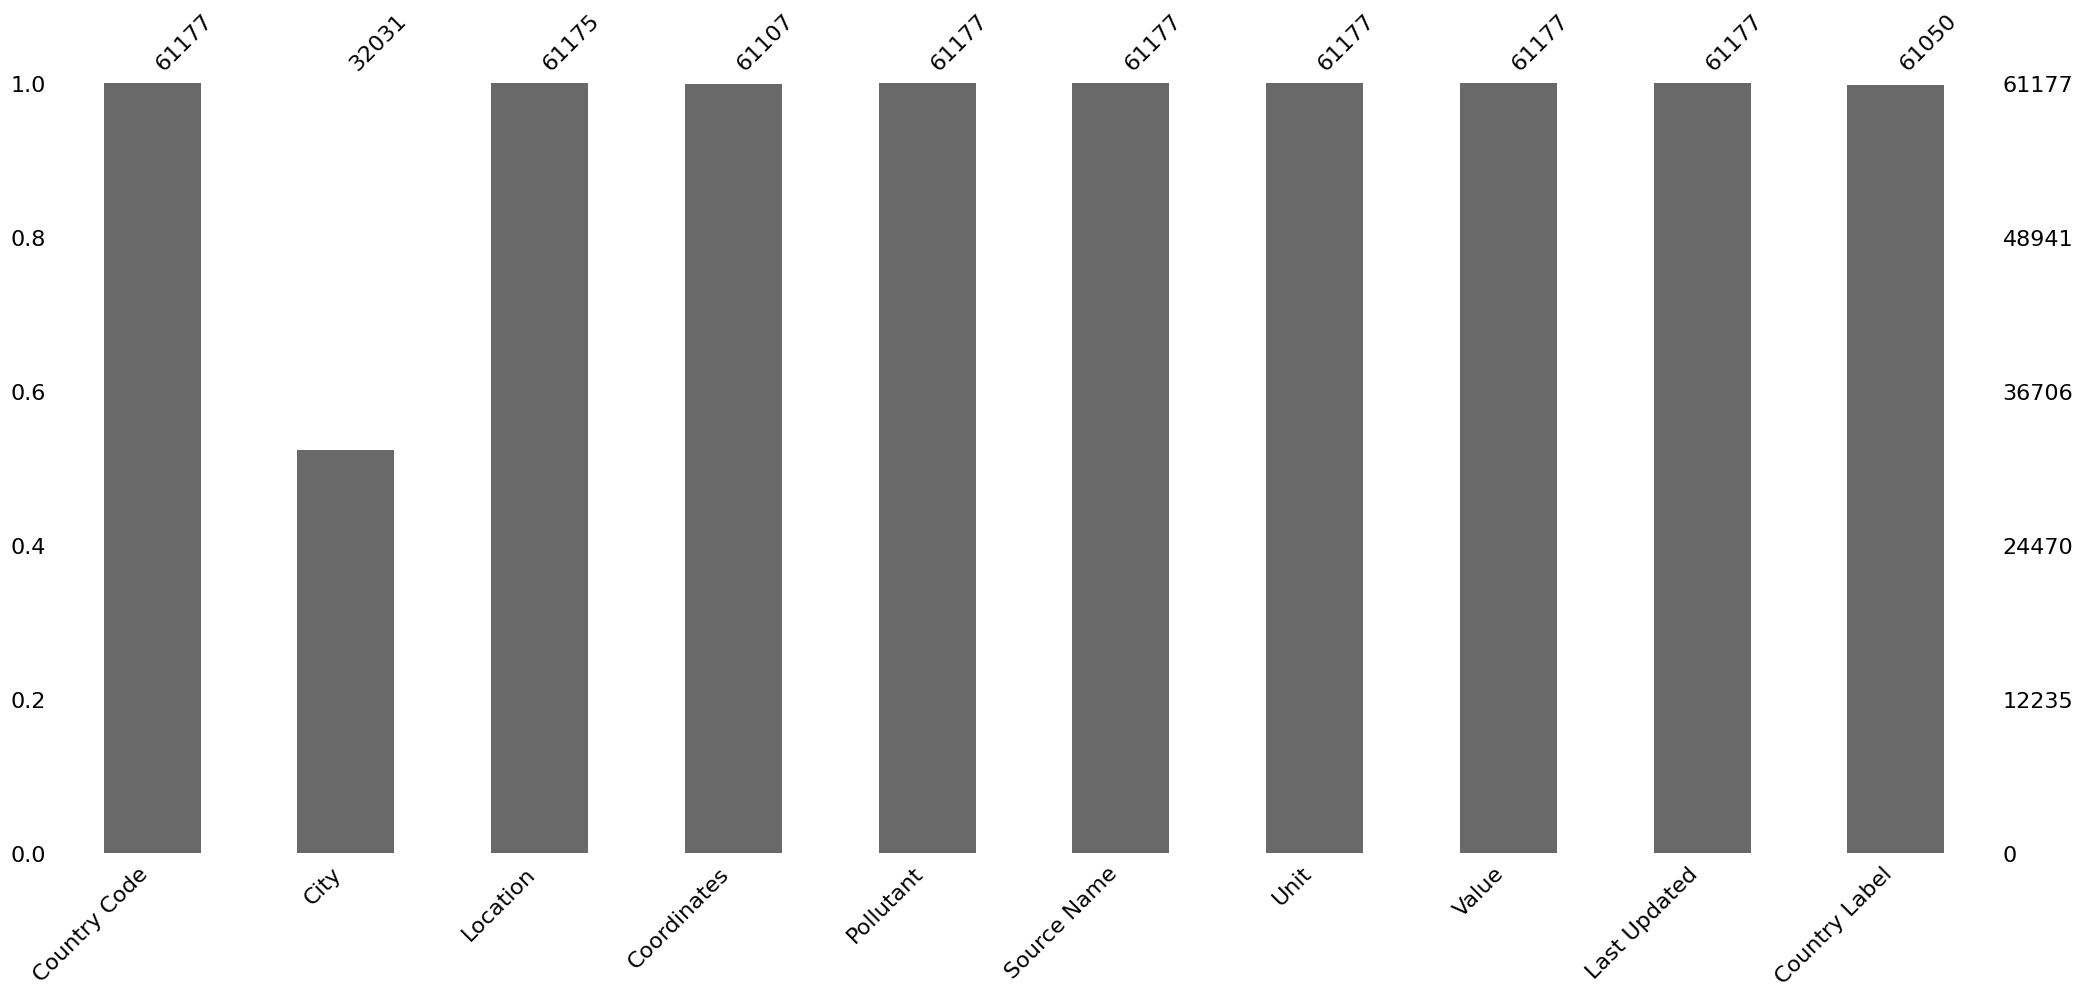

In [4]:
msno.bar(df)

In [5]:
df.shape

(61177, 10)

In [6]:
df.isnull().sum()

,0
Country Code,0
City,29146
Location,2
Coordinates,70
Pollutant,0
Source Name,0
Unit,0
Value,0
Last Updated,0
Country Label,127


<Axes: >

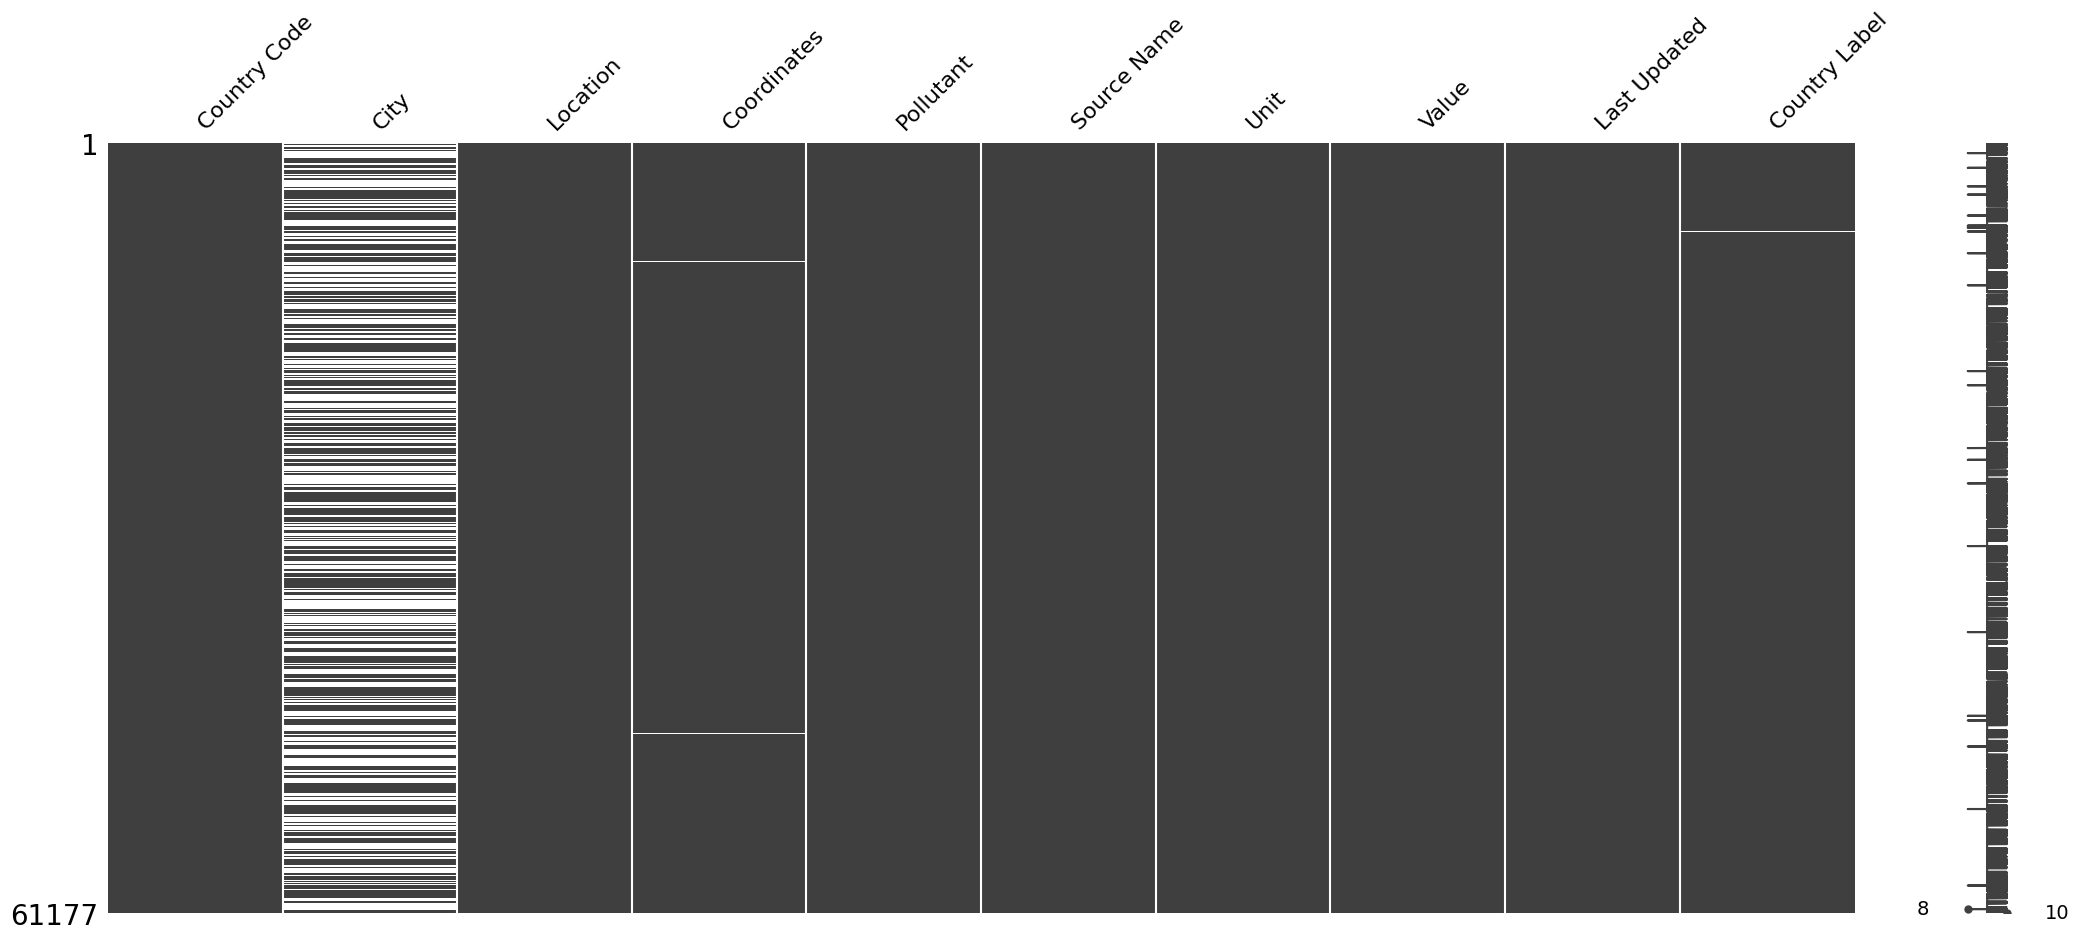

In [7]:
#Here viewing as a matrix shows me how they are missing in the data


msno.matrix(df)

<Axes: >

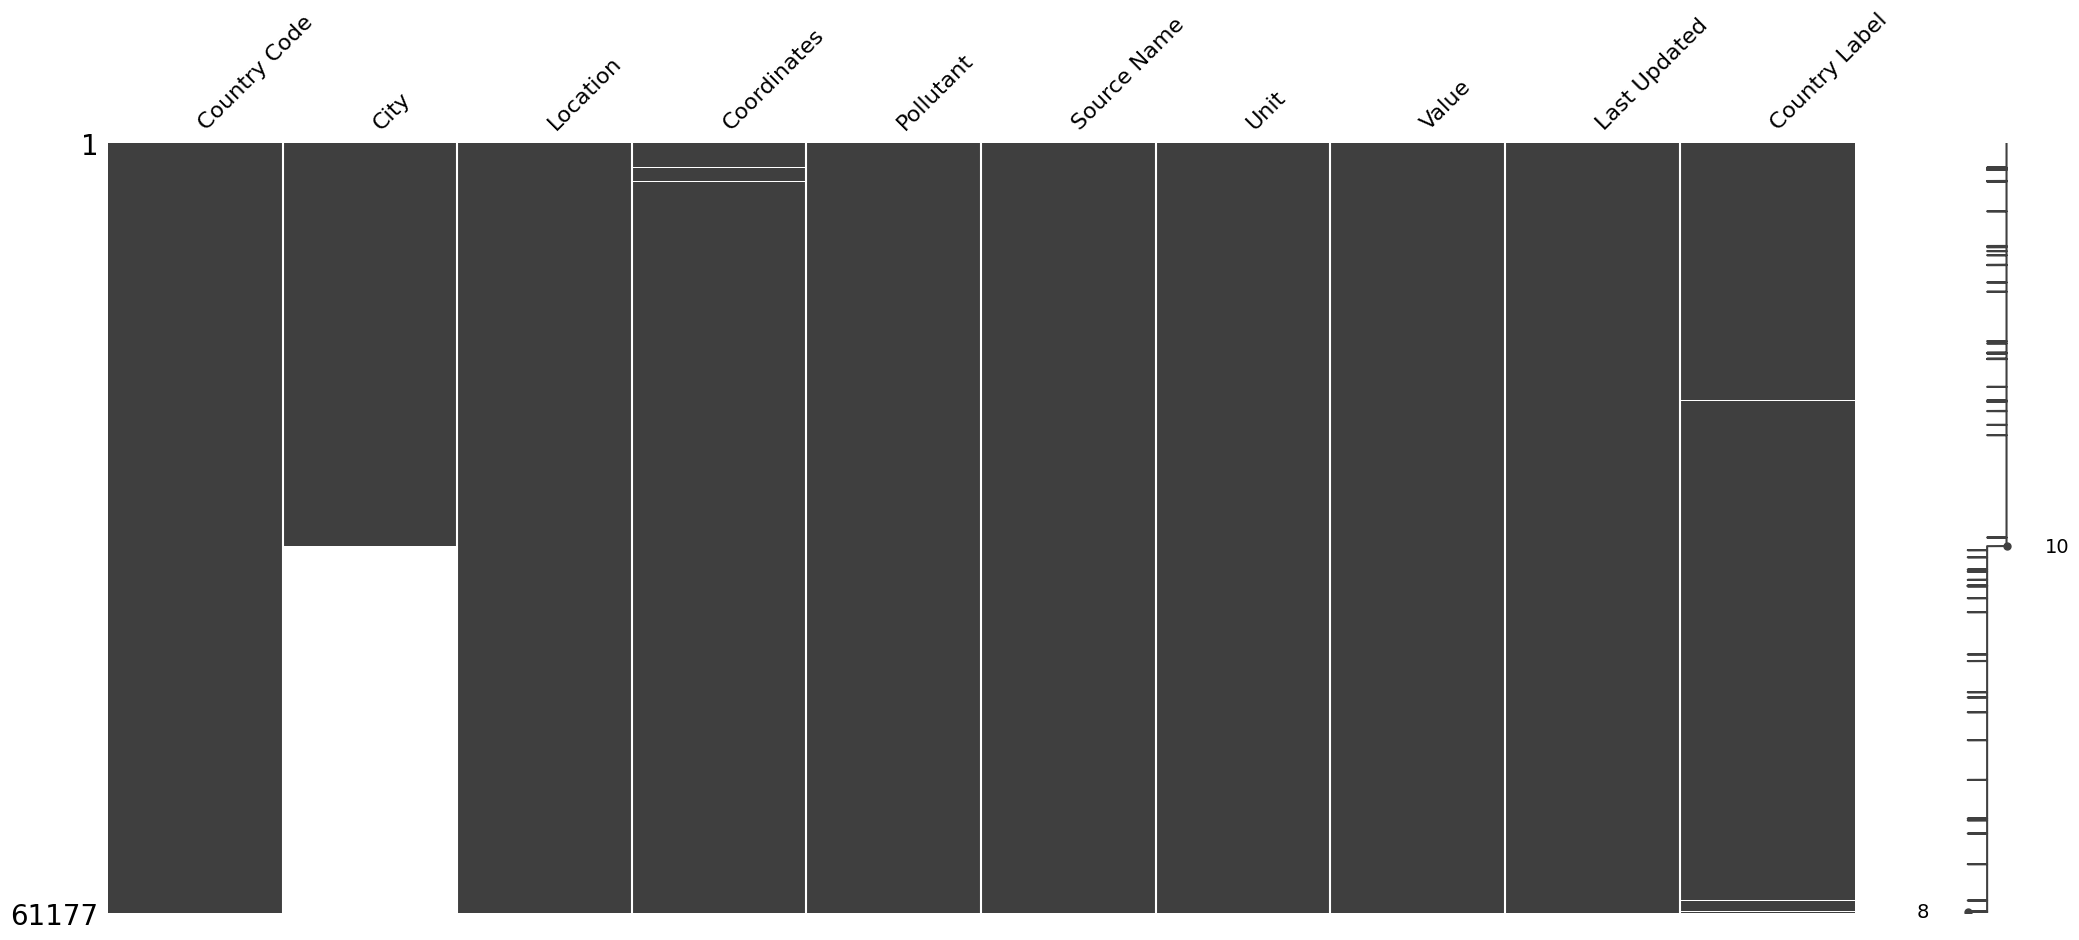

In [8]:
#Sort data according to city just to see if there is some connecttion between the city values and their corresponding first and last readings.

sorted = df.sort_values('City')
msno.matrix(sorted)

##Reasons for Missing Values
Before we start treating the missing values ,it is important to understand the various reasons for the missingness in data.


From the visual,the missing values in "City" column can be classified as MAR(Missing At Random) and that of the coordinates as (MCAR)Missing Completely at Random. Read More [Here](https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python#Reasons-for-Missing-Values)

### Next Steps?
I am going to delete all the rows that have missing values for the "City" column.

#### Side Step:
I will also make use of an imputation technique to fill in the missing values later.

This can help see the impact the imputation has on the results.


In [9]:
#Deleting using Listwise deletion
df.dropna(subset=['City'], inplace=True)
df.dropna(subset=['Coordinates'], inplace=True)
df.dropna(subset=['Country Label'], inplace=True)
df.dropna(subset=['Location'], inplace=True)
df.isnull().sum()

,0
Country Code,0
City,0
Location,0
Coordinates,0
Pollutant,0
Source Name,0
Unit,0
Value,0
Last Updated,0
Country Label,0


In [10]:
df.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
0,RS,Belgrade,Belgrade-Stari grad,"44.821119999948465, 20.459112999622317",NO2,eea,µg/m³,44.854320,2024-08-01T07:00:00+00:00,Serbia
1,RS,Novi Pazar,Novi Pazar,"43.13970399996856, 20.516353000044464",SO2,eea,µg/m³,16.309677,2024-07-31T07:00:00+00:00,Serbia
2,RS,DROBETA TURNU SEVERIN,MH-1,"44.62663300021146, 22.661981000118214",NO2,eea,µg/m³,-1.000000,2024-08-01T07:00:00+00:00,Serbia
3,RS,Vranje,Vranje,"42.55112499985959, 21.896555999583192",CO,eea,µg/m³,320.017445,2024-07-31T07:00:00+00:00,Serbia
4,RS,Bor Krivelj,Bor Krivelj,"44.137878, 22.093133",SO2,serbia,µg/m³,11.789101,2024-07-31T07:00:00+00:00,Serbia


## 3. Exploratory Data Analysis (EDA)

- Standardization of the units, and also pick just one pollutant. OR The most Popular Polutant
- Descriptive Statistics: Mean, median, max/min PM2.5 by city/country.
- Visualizations:
Time-series plots (daily/monthly trends).
Heatmaps (geospatial distribution using folium or plotly).
Boxplots (compare cities/countries).
- Correlations:
PM2.5 vs. GDP/population density (if data is available).
PM2.5 vs. weather (humidity, temperature).


In [11]:
#Count for each pollutant
df['Pollutant'].value_counts()

,count
Pollutant,
PM2.5,5843
NO2,5700
O3,5648
PM10,5445
SO2,3691
NO,2509
CO,2270
NOX,622
BC,122


In [12]:
#Highest count of pollutant
df['Pollutant'].value_counts().idxmax()

'PM2.5'

### Popular Polutant Found

From the above, it can be seen that the most popular pollutant is the obvious "PM2.5". Read more about it [here](https://ww2.arb.ca.gov/resources/inhalable-particulate-matter-and-health)

### Proceeding with only PM2.5
Here, I am proceeding with PM2.5 Pollutant

In [13]:
#Extract only data where pollutant is PM2.5
df = df[df['Pollutant'] == 'PM2.5']
df1 = df.copy()
df1.head()

,Country Code,City,Location,Coordinates,Pollutant,Source Name,Unit,Value,Last Updated,Country Label
15,SE,Stockholm,Stockholm St Eriksgatan 83,"59.340499999492835, 18.037016000448006",PM2.5,eea,µg/m³,2.45222,2024-08-01T07:00:00+00:00,Sweden
21,SK,Topolniky,"""Topolniky - Aszod/EMEP""","47.95944799951678, 17.86014400022871",PM2.5,eea,µg/m³,28.20500,2024-08-01T07:00:00+00:00,Slovakia
24,SK,Trebisov,"""Trebisov - T. G. Masaryka""","48.62834399968534, 21.713303999824376",PM2.5,eea,µg/m³,16.77900,2024-08-01T07:00:00+00:00,Slovakia
27,TH,Buriram,Buriram City Hall,"14.945452000000001, 103.10589600000002",PM2.5,Air4Thai,µg/m³,7.60000,2024-07-06T08:00:00+00:00,Thailand
28,TH,Phayao,"Phayao Provincial, Phayao","19.200226, 99.893048",PM2.5,Air4Thai,µg/m³,9.70000,2024-07-06T08:00:00+00:00,Thailand


In [14]:
#Additionally, I am proceeding with units measured in µg/m³ only, this is to ensure all the values have the same unit of measurement
df1 = df1[df1['Unit'] == 'µg/m³']
df1.shape



(5837, 10)

In [15]:
def check_units_standardized(df1):
    """
    Check if all PM2.5 measurements use 'µg/m³' units.

    Args:
        df: DataFrame containing air quality data

    Returns:
        str: Standardization status message
    """
    if df1['Unit'].eq('µg/m³').all():
        return "✅ All units are standardized (µg/m³)"
    else:
        non_standard = df1[df1['Unit'] != 'µg/m³']['Unit'].unique()
        return f"❌ Not standardized. Found: {', '.join(non_standard)}"


# Checking with my DataFrame
result = check_units_standardized(df1)
print(result)

✅ All units are standardized (µg/m³)


In [16]:
#Additionally, the pollutant and unit column should return only one unique value

df1.nunique()

,0
Country Code,89
City,2632
Location,4749
Coordinates,5287
Pollutant,1
Source Name,95
Unit,1
Value,1683
Last Updated,1630
Country Label,89


### All the values have the same units now

Next is to describe the data.

### Descriptive Statistics
Here I am having a look at the data and see what the vlaues mean for the air quality.


In [21]:
df1.describe()

,Value
count,5837.000000
mean,-8.525568
std,419.069824
min,-9999.000000
25%,4.000000
50%,7.650000
75%,13.440000
max,1349.300000


### Negative Mean, Second look at the Data

It seams there could be an outlier or an invalid negative number as a value for the the PM2.5 reading. So I am going to check that.

Reasoning: PM2.5 refers to particulate matter that is 2.5 micrometers or less in diameter. In general, PM2.5 levels below 12 μg/m³ are considered healthy with minimal risk, while levels at or above 35 μg/m³ during a 24-hour period can cause health issues, especially for individuals with respiratory problems like asthma.

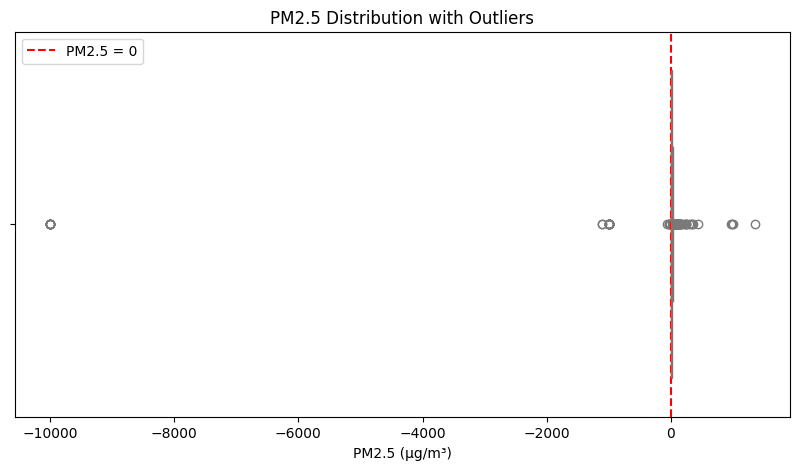

In [27]:
#Checking for invalid negative value affecting the mean using a box plot

plt.figure(figsize=(10, 5))
sns.boxplot(data=df1, x='Value', orient='h', color='lightblue')
plt.axvline(0, color='red', linestyle='--', label='PM2.5 = 0')
plt.title('PM2.5 Distribution with Outliers')
plt.xlabel('PM2.5 (µg/m³)')
plt.legend()
plt.show()